In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance
!pip install stockstats
!pip install matplotlib
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pandas, pandas_datareader, numpy and matplotlib

import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [ ]:
from stockstats import StockDataFrame
import pandas_datareader.data as pdr

In [ ]:
import yfinance as yfin
yfin.pdr_override()
stk_tickers = ["MSFT", "IBM", "GOOGL", "AMZN","AAPL","CSCO","HD"]
stk_data = pdr.get_data_yahoo(stk_tickers)
stk_data


[*********************100%***********************]  7 of 7 completed


Adj Close                                               \
                  AAPL       AMZN       CSCO      GOOGL          HD   
Date                                                                  
1962-01-02         NaN        NaN        NaN        NaN         NaN   
1962-01-03         NaN        NaN        NaN        NaN         NaN   
1962-01-04         NaN        NaN        NaN        NaN         NaN   
1962-01-05         NaN        NaN        NaN        NaN         NaN   
1962-01-08         NaN        NaN        NaN        NaN         NaN   
...                ...        ...        ...        ...         ...   
2023-02-22  148.910004  95.790001  49.310001  91.650002  296.299988   
2023-02-23  149.399994  95.820000  49.209999  90.889999  299.309998   
2023-02-24  146.710007  93.500000  48.480000  89.129997  296.660004   
2023-02-27  147.919998  93.760002  48.730000  89.870003  296.010010   
2023-02-28  147.410004  94.230003  48.419998  90.059998  296.540009   

                                         Close                        ...  \
                   IBM        MSFT        AAPL       AMZN       CSCO  ...   
Date                                                                  ...   
1962-01-02    1.613219         NaN         NaN        NaN        NaN  ...   
1962-01-03    1.627321         NaN         NaN        NaN        NaN  ...   
1962-01-04    1.611102         NaN         NaN        NaN        NaN  ...   
1962-01-05    1.579375         NaN         NaN        NaN        NaN  ...   
1962-01-08    1.549760         NaN         NaN        NaN        NaN  ...   
...                ...         ...         ...        ...        ...  ...   
2023-02-22  130.970001  251.509995  148.910004  95.790001  49.310001  ...   
2023-02-23  130.789993  254.770004  149.399994  95.820000  49.209999  ...   
2023-02-24  130.570007  249.220001  146.710007  93.500000  48.480000  ...   
2023-02-27  130.490005  250.160004  147.919998  93.760002  48.730000  ...   
2023-02-28  129.300003  249.419998  147.410004  94.230003  48.419998  ...   

                  Open                              Volume              \
                    HD         IBM        MSFT        AAPL        AMZN   
Date                                                                     
1962-01-02         NaN    7.374124         NaN         NaN         NaN   
1962-01-03         NaN    7.291268         NaN         NaN         NaN   
1962-01-04         NaN    7.355003         NaN         NaN         NaN   
1962-01-05         NaN    7.272148         NaN         NaN         NaN   
1962-01-08         NaN    7.131931         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-02-22  297.549988  131.899994  254.089996  51011300.0  59534100.0   
2023-02-23  296.790009  131.500000  255.559998  48394200.0  48467000.0   
2023-02-24  292.399994  129.619995  249.960007  55418200.0  57010100.0   
2023-02-27  299.359985  131.419998  252.460007  44998500.0  47470300.0   
2023-02-28  295.000000  130.550003  249.070007  50455400.0  43901300.0   

                                                                    
                  CSCO       GOOGL         HD      IBM        MSFT  
Date                                                                
1962-01-02         NaN         NaN        NaN   407940         NaN  
1962-01-03         NaN         NaN        NaN   305955         NaN  
1962-01-04         NaN         NaN        NaN   274575         NaN  
1962-01-05         NaN         NaN        NaN   384405         NaN  
1962-01-08         NaN         NaN        NaN   572685         NaN  
...                ...         ...        ...      ...         ...  
2023-02-22  20301900.0  30884000.0  5922100.0  3200200  22491100.0  
2023-02-23  14066200.0  41206400.0  4354500.0  3725600  29219100.0  
2023-02-24  17251300.0  36554600.0  3713000.0  3015800  24978700.0  
2023-02-27  14776400.0  27502300.0  3238300.0  2761300  21190000.0  
2023-

# Single stock example

## Params

In [ ]:
# params change this to modify the whole thing
pred_stock = 'MSFT'
num_folds = 2
scoring_mse = "neg_mean_squared_error"
scoring_mae = "mean_absolute_error"
scoring_r2_score = "neg_r2_score"
scoring_ape = "neg_mean_absolute_percentage_error"

In [ ]:
from google.colab import files

#stk_data.to_csv("stk_data.csv")
#files.download("stk_data.csv")

In [ ]:
interested_stock = stk_tickers.copy()
interested_stock.remove(pred_stock)
interested_stock

['IBM', 'GOOGL', 'AMZN', 'AAPL', 'CSCO', 'HD']

In [ ]:
temp = pd.DataFrame({"close": stk_data.loc[:, ('Adj Close', pred_stock)],
"open": stk_data.loc[:, ('Open', pred_stock)],
"high" : stk_data.loc[:, ('High', pred_stock)],
"low" : stk_data.loc[:, ('Low', pred_stock)],
"volume" : stk_data.loc[:, ('Volume', pred_stock)]})
pred_stockDataFrame = StockDataFrame(temp.copy())

In [ ]:
for stock in interested_stock:
  temp[stock] = pd.DataFrame({stock: stk_data.loc[:, ('Adj Close', stock)]})
  

In [ ]:
temp['next_close'] = temp['close'].shift(-1)

In [ ]:
# Add a feature
temp["movement percent"] = np.where((temp["close"]-temp["open"])==0 , 0,  (temp["high"]-temp["low"])/(temp["close"]-temp["open"]))
temp.drop(["open","high","low"],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

## models

In [ ]:
models = []
# Do modelName, modelFunc, errorValueTemp
models.append(('LR', LinearRegression(),np.inf))
# Boosting methods
models.append(('GBR', GradientBoostingRegressor(),np.inf))

# Normally ridge would be one model but since it's a model that run fastest
models.append(('R1',Ridge(alpha=1),np.inf))
models.append(('R0.5',Ridge(alpha=0.5),np.inf))
models.append(('R0.2',Ridge(alpha=0.2),np.inf))
models.append(('R3',Ridge(alpha=3),np.inf))
models.append(('LASSO', Lasso(),np.inf))
models.append(('EN',ElasticNet(),np.inf))
models.append(('KNN',KNeighborsRegressor(),np.inf))
models.append(('CART',DecisionTreeRegressor(),np.inf))
models.append(('SVR',SVR(),np.inf))
# Boosting methods
models.append(('ABR',AdaBoostRegressor(),np.inf))
models.append(('GBR',GradientBoostingRegressor(),np.inf))
# Bagging methods
models.append(('RFR',RandomForestRegressor(),np.inf))
models.append(('ETR',ExtraTreesRegressor(),np.inf))


In [ ]:
used_data = temp.dropna().copy()

In [ ]:
# First separation, one for training and choosing, the other for testing
used_data_xtrain, used_data_xtest, used_data_ytrain, used_data_ytest = train_test_split(used_data.drop("next_close",axis=1), used_data["next_close"], test_size=0.3, shuffle=False)
trainAndEval = pd.concat([used_data_xtrain,used_data_ytrain],axis=1)  

In [ ]:

data = trainAndEval
# Transform in case we use lasso
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data.drop("next_close",axis=1), data["next_close"], test_size=0.4, shuffle=False)
X_train_fit = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_fit = pd.DataFrame(  scaler.transform(X_test),columns = X_test.columns)


names = []
kfold_results = []
test_results = []
train_results = []

for name, model,err in models:
    names.append(name)
    ## k-fold analysis:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train_fit, y_train, cv=kfold, scoring=scoring_mse)
    kfold_results.append(cv_results)
    # Full Training period
    model.fit(X_train_fit, y_train)
    train_result = mean_squared_error(model.predict(X_train_fit), y_train)
    train_results.append(train_result)
    # Test results
    test_result = mean_squared_error(model.predict(X_test_fit), y_test)
    test_results.append(test_result)
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)
res = pd.DataFrame({"name" :[x[0] for x in models], "test_results":test_results})

LR: 0.123537 (0.036311) 0.107398 0.451148
GBR: 0.688673 (0.244619) 0.068325 335.117410
R1: 0.121118 (0.031198) 0.107406 0.450773
R0.5: 0.121974 (0.033449) 0.107400 0.450931
R0.2: 0.122804 (0.035071) 0.107398 0.451054
R3: 0.121574 (0.025180) 0.107468 0.450710
LASSO: 1.995804 (1.534931) 1.108537 79.696465
EN: 2.557644 (1.376308) 1.366963 90.539966
KNN: 3.043993 (0.186667) 0.140036 354.977294
CART: 0.790324 (0.228495) 0.000000 312.898227
SVR: 2.977605 (2.127604) 0.142390 539.242190
ABR: 0.709375 (0.332396) 0.169906 349.151039
GBR: 0.662035 (0.257486) 0.068325 337.411053
RFR: 0.412476 (0.257786) 0.017011 328.444310
ETR: 1.468660 (0.415519) 0.000000 328.438398


In [ ]:
# Get the minimum mean squared error model
minModelName = list(res[res["test_results"]==min(res["test_results"])]["name"])[0]
minModelName

'R3'

In [ ]:
# Prediction on real test
predictionsmse = []
for name, model,err in models:
  if name == minModelName:
    predictionsmse = model.predict(pd.DataFrame(scaler.transform(used_data_xtest),columns = used_data_xtest.columns))

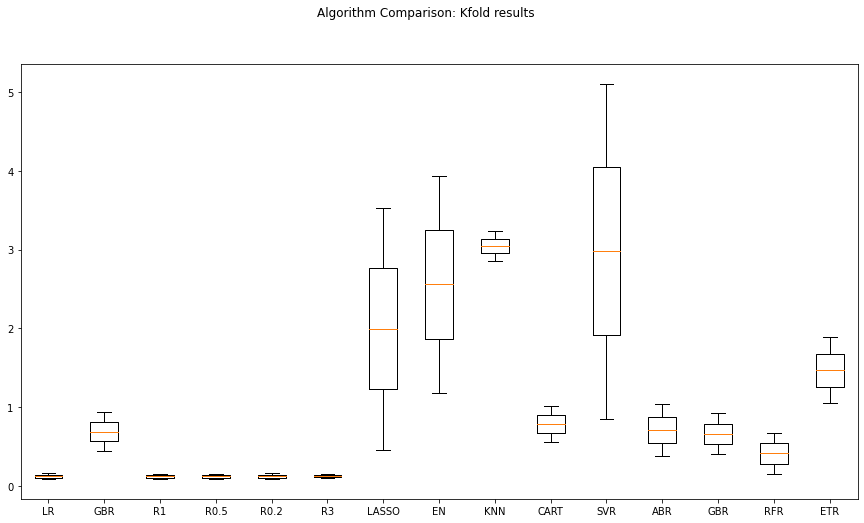

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

MAE

In [ ]:
##  scoring_mae = "mean_absolute_error"
data = trainAndEval
# Transform in case we use lasso
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data.drop("next_close",axis=1), data["next_close"], test_size=0.4, shuffle=False)
X_train_fit = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_fit = pd.DataFrame(  scaler.transform(X_test),columns = X_test.columns)


names = []
kfold_results_mae = []
test_results_mae = []
train_results_mae = []

for name, model,err in models:
    names.append(name)
    ## k-fold analysis:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results_mae = -1* cross_val_score(model, X_train_fit, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    kfold_results_mae.append(cv_results_mae)
    # Full Training period
    model.fit(X_train_fit, y_train)
    train_result_mae = mean_absolute_error(model.predict(X_train_fit), y_train)
    train_results_mae.append(train_result_mae)
    # Test results
    test_result_mae = mean_absolute_error(model.predict(X_test_fit), y_test)
    test_results_mae.append(test_result_mae)
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result_mae, test_result_mae)
    print(msg)
res = pd.DataFrame({"name" :[x[0] for x in models], "test_results_mae":test_results_mae})

LR: 1.468660 (0.415519) 0.223465 0.480420
GBR: 1.468660 (0.415519) 0.190240 14.056156
R1: 1.468660 (0.415519) 0.223569 0.479923
R0.5: 1.468660 (0.415519) 0.223515 0.480151
R0.2: 1.468660 (0.415519) 0.223484 0.480304
R3: 1.468660 (0.415519) 0.223857 0.479580
LASSO: 1.468660 (0.415519) 0.805424 7.575020
EN: 1.468660 (0.415519) 0.848435 7.843710
KNN: 1.468660 (0.415519) 0.250746 14.817387
CART: 1.468660 (0.415519) 0.000000 13.762146
SVR: 1.468660 (0.415519) 0.237153 19.294248
ABR: 1.468660 (0.415519) 0.328074 14.592934
GBR: 1.468660 (0.415519) 0.190240 14.025616
RFR: 1.468660 (0.415519) 0.089916 13.834323
ETR: 1.468660 (0.415519) 0.000000 13.955045


In [ ]:
minModelmaeName = list(res[res["test_results_mae"]==min(res["test_results_mae"])]["name"])[0]

In [ ]:
# Prediction on real test
predictionsmae = []
for name, model,err in models:
  if name == minModelmaeName:
    predictionsmae = model.predict(pd.DataFrame(scaler.transform(used_data_xtest),columns = used_data_xtest.columns))

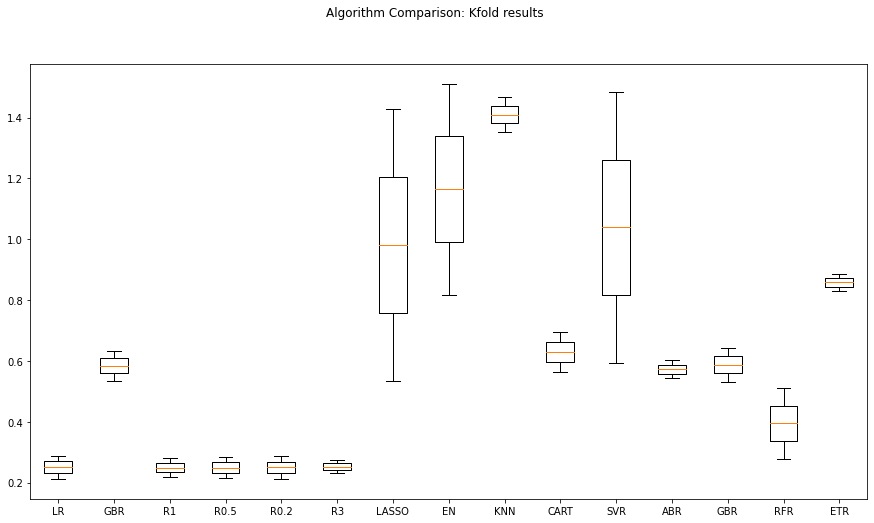

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results_mae)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

scoring_ape

In [ ]:
##  scoring_ape = "neg_mean_absolute_percentage_error"
data = trainAndEval
# Transform in case we use lasso
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data.drop("next_close",axis=1), data["next_close"], test_size=0.4, shuffle=False)
X_train_fit = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_fit = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)


names = []
kfold_results = []
test_resultsape = []
train_resultsape = []

for name, model,err in models:
    names.append(name)
    ## k-fold analysis:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train_fit, y_train, cv=kfold, scoring='neg_mean_absolute_percentage_error')
    kfold_results.append(cv_results)
    # Full Training period
    model.fit(X_train_fit, y_train)
    train_result_ape = mean_absolute_percentage_error(model.predict(X_train_fit), y_train)
    train_resultsape.append(train_result_ape)
    # Test results
    test_result_ape = mean_absolute_percentage_error(model.predict(X_test_fit), y_test)
    test_resultsape.append(test_result_ape)
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result_ape, test_result_ape)
    print(msg)
res = pd.DataFrame({"name" :[x[0] for x in models], "test_resultsape":test_resultsape})

LR: 0.012866 (0.002303) 0.011580 0.011863
GBR: 0.031634 (0.005406) 0.009782 0.523425
R1: 0.012852 (0.001962) 0.011586 0.011843
R0.5: 0.012837 (0.002118) 0.011583 0.011852
R0.2: 0.012849 (0.002224) 0.011581 0.011858
R3: 0.013137 (0.001505) 0.011603 0.011822
LASSO: 0.052573 (0.025804) 0.041304 0.213540
EN: 0.061506 (0.021399) 0.043372 0.220679
KNN: 0.075191 (0.005131) 0.013003 0.580099
CART: 0.035808 (0.003303) 0.000000 0.510909
SVR: 0.056035 (0.027715) 0.012300 0.960355
ABR: 0.030845 (0.004608) 0.017256 0.557786
GBR: 0.031560 (0.005317) 0.009782 0.529330
RFR: 0.021510 (0.007971) 0.004667 0.522926
ETR: 0.048372 (0.004209) 0.000000 0.525826


In [ ]:
minModelapeName = list(res[res["test_resultsape"]==min(res["test_resultsape"])]["name"])[0]

In [ ]:
# Prediction on real test
predictionsape = []
for name, model,err in models:
  if name == minModelapeName:
    predictionsape = model.predict(pd.DataFrame(scaler.transform(used_data_xtest),columns = used_data_xtest.columns))

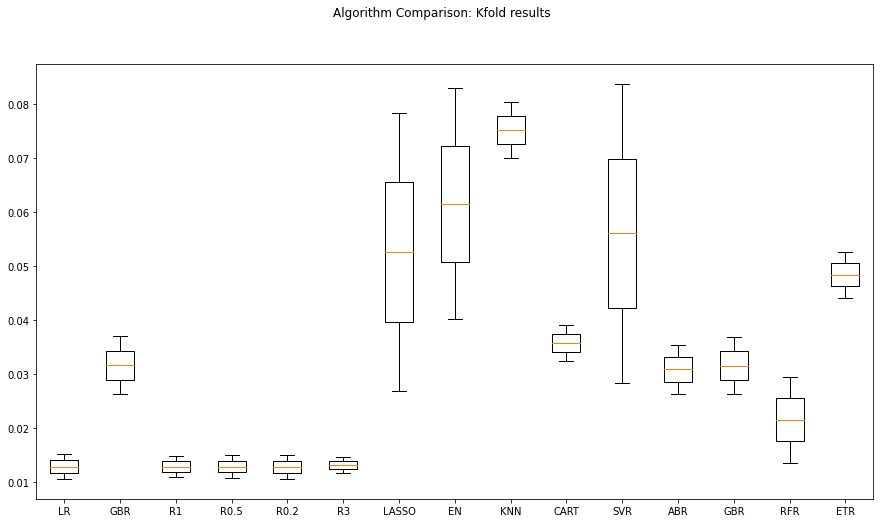

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

## Graph prediction

mse

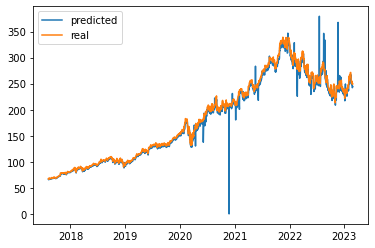

In [ ]:
predictionsmse
for i in range(1,len(predictionsmse)):
  if predictionsmse[i] < 0:
    predictionsmse[i] = 0
plt.plot(used_data_ytest.index, predictionsmse, label = "predicted")
plt.plot(used_data_ytest.index, used_data_ytest, label = "real")
plt.legend()
plt.show()

mae

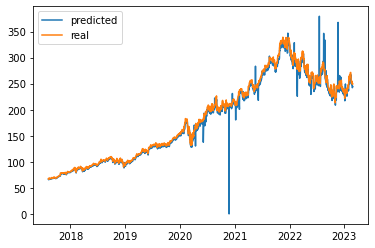

In [ ]:
predictionsmae
for i in range(1,len(predictionsmae)):
  if predictionsmae[i] < 0:
    predictionsmae[i] = 0
plt.plot(used_data_ytest.index, predictionsmae, label = "predicted")
plt.plot(used_data_ytest.index, used_data_ytest, label = "real")
plt.legend()
plt.show()

ape

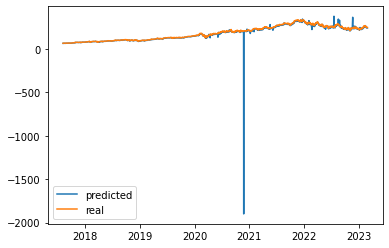

In [ ]:
predictionsape
for i in range(1,len(predictionsape)):
  if predictionsmae[i] < 0:
    predictionsmae[i] = 0
plt.plot(used_data_ytest.index, predictionsape, label = "predicted")
plt.plot(used_data_ytest.index, used_data_ytest, label = "real")
plt.legend()
plt.show()

# Multiple Stock

Objective is to for each stock,
- get stock name 
- best model for that stock 
- error from prediction on test set at second separation
- prediction price 
- real thing (the test set from first separation)

Then select 5 with lowest error from prediction on test set at second separation

## Params & models

Modify values here

In [ ]:
import math
# params change this to modify the whole thing

# For crossvalidation stuff
num_folds = 2
scoring_mse = "neg_mean_squared_error"

# For simple trade strategy
# Number of stocks to pick minimum error from record
nstocks = 5
test_size = 0.3


# Set model
models = []
#Do modelName, modelFunc, errorValueTemp
models.append(('Linear Regression', LinearRegression(),np.inf))
# Boosting methods
models.append(('Gradient Boosting Regressor', GradientBoostingRegressor(),np.inf))

# Normally ridge would be one model but since it's a model that run fastest
models.append(('R1',Ridge(alpha=1),np.inf))
models.append(('R0.5',Ridge(alpha=0.5),np.inf))
models.append(('R0.2',Ridge(alpha=0.2),np.inf))
models.append(('R3',Ridge(alpha=3),np.inf))
models.append(('LASSO', Lasso(),np.inf))
models.append(('EN',ElasticNet(),np.inf))
models.append(('KNN',KNeighborsRegressor(),np.inf))
models.append(('CART',DecisionTreeRegressor(),np.inf))
models.append(('SVR',SVR(),np.inf))
models.append(('MLP',MLPRegressor(),np.inf))
# Boosting methods
models.append(('ABR',AdaBoostRegressor(),np.inf))
models.append(('GBR',GradientBoostingRegressor(),np.inf))
# Bagging methods
models.append(('RFR',RandomForestRegressor(),np.inf))
models.append(('ETR',ExtraTreesRegressor(),np.inf))

# Can add Arima here


In [ ]:
# Record for all stocks
record = {}

for stock in stk_tickers:
  # Select a stock
  pred_stock = stock
  # Remove the stock out from concatinating
  interested_stock = stk_tickers.copy()
  interested_stock.remove(pred_stock)
  interested_stock

  # Set stock dataframe
  temp = pd.DataFrame({"close": stk_data.loc[:, ('Adj Close', pred_stock)],
  "open": stk_data.loc[:, ('Open', pred_stock)],
  "high" : stk_data.loc[:, ('High', pred_stock)],
  "low" : stk_data.loc[:, ('Low', pred_stock)],
  "volume" : stk_data.loc[:, ('Volume', pred_stock)]})
  pred_stockDataFrame = StockDataFrame(temp.copy())

  for stock in interested_stock:
    temp[stock] = pd.DataFrame({stock: stk_data.loc[:, ('Adj Close', stock)]})
    
  temp['next_close'] = temp['close'].shift(-1)
  # Add a feature
  temp["movement percent"] = np.where((temp["close"]-temp["open"])==0 , 0,  (temp["high"]-temp["low"])/(temp["close"]-temp["open"]))

  temp.drop(["open","high","low"],axis=1,inplace=True)

  used_data = temp.dropna().copy()

  # First separation, one for training and choosing, the other for testing
  used_data_xtrain, used_data_xtest, used_data_ytrain, used_data_ytest = train_test_split(used_data.drop("next_close",axis=1), used_data["next_close"], test_size=test_size, shuffle=False)
  trainAndEval = pd.concat([used_data_xtrain,used_data_ytrain],axis=1) 

  # Performing the transformation
  data = trainAndEval
  # In case we use lasso
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(data.drop("next_close",axis=1), data["next_close"], test_size=0.4, shuffle=False)
  X_train_fit = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
  X_test_fit = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)


  names = []
  kfold_results = []
  test_results = []
  train_results = []

  for name, model,err in models:
      names.append(name)
      ## k-fold analysis:
      # kfold = KFold(n_splits=num_folds, random_state=seed)
      kfold = KFold(n_splits=num_folds)
      # converted mean squared error to positive. The lower the better
      cv_results = -1* cross_val_score(model, X_train_fit, y_train, cv=kfold, scoring=scoring_mse)
      kfold_results.append(cv_results)
      # Full Training period
      model.fit(X_train_fit, y_train)
      train_result = mean_squared_error(model.predict(X_train_fit), y_train)
      train_results.append(train_result)
      # Test results
      test_result = mean_squared_error(model.predict(X_test_fit), y_test)
      test_results.append(test_result)
  res = pd.DataFrame({"name" :[x[0] for x in models], "test_results":test_results})
  # Get the minimum mean squared error model
  minModelName = list(res[res["test_results"]==min(res["test_results"])]["name"])[0]
  
  # Prediction on real test
  predictions = []
  record_model = None
  for name, model,err in models:
    if name == minModelName:
      predictions = model.predict(pd.DataFrame(scaler.transform(used_data_xtest),columns = used_data_xtest.columns))
      
      record_model = model
  for i in range(1,len(predictions)):
    if predictions[i] < 0:
      predictions[i] = 0
  record[pred_stock] = {"model_name":minModelName, 
                        "model_func":record_model,
                        "error":min(res["test_results"]),
                        "pred":pd.DataFrame(predictions,index=used_data_ytest.index),
                        "real":used_data_ytest}

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

## Retrieving stocks

In [ ]:
# Sorted dict based on minimum error
# [0: nstocks] means get n number of stocks
min_err_list = {}
if nstocks < 0:
  raise ValueError("nstocks must be more than 0, minimum is 1") 
elif nstocks > len(record):
  min_err_list = record
else:
  min_err_list=sorted(record.items(),key=lambda x: x[1]['error'],reverse=False)[0:nstocks]

In [ ]:
min_err_list

[('CSCO',
  {'model_name': 'Linear Regression',
   'model_func': LinearRegression(),
   'error': 0.07931467562398557,
   'pred':                     0
   Date                 
   2017-08-07  26.641494
   2017-08-08  26.498473
   2017-08-09  26.457270
   2017-08-10  25.950669
   2017-08-11  26.339263
   ...               ...
   2023-02-21  48.003259
   2023-02-22  47.709703
   2023-02-23  47.804224
   2023-02-24  46.964166
   2023-02-27  47.380045
   
   [1399 rows x 1 columns],
   'real': Date
   2017-08-07    26.773432
   2017-08-08    26.731161
   2017-08-09    26.207026
   2017-08-10    26.604353
   2017-08-11    26.917150
                   ...    
   2023-02-21    49.310001
   2023-02-22    49.209999
   2023-02-23    48.480000
   2023-02-24    48.730000
   2023-02-27    48.419998
   Name: next_close, Length: 1399, dtype: float64}),
 ('AAPL',
  {'model_name': 'Linear Regression',
   'model_func': LinearRegression(),
   'error': 0.12365379211257639,
   'pred':                      0

# A bunch of trade strategy



### trade params

Modify here to change starting value and result of trade strategy

In [ ]:
#starting cash
cash = 10000
#transaction cost
transac = 0.002
#days to hold
hold_days = 5
#new params for rebalance strategy
rebal_days = 20

### Equally weighted

When more than half of the prediction in n number nstocks goes up, we buy all of them equally. 
We start with cash of 10,000. 
So if we have two stocks at price 70 and 80, We buy 10000/2/70 and 10000/2/80 amount.

We then hold it for 5 days (1 week of trading month)


#### Set up

In [ ]:
n_decision = math.ceil(nstocks/2.0)
cash = 10000
stock_pos = [0]*nstocks
starting_cash = cash 
hold_days = 5
days = hold_days
#transaction cost
transac = 0.002
#Cash money
money_record = [0]* len(min_err_list[0][1]["real"].index)
holding = False

In [ ]:
idx = 0
for i in range(0,len(min_err_list[0][1]["real"].index)):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]
  # number where prediction up i
  pred_up = (sum(pred>real))
  if (not holding) & (pred_up >=n_decision):
    holding = True 
    # position array
    stock_pos = np.array([starting_cash*(1-transac)]*nstocks)/nstocks / real
    money_record[i] = sum(stock_pos*real)
    # print("buy")
    # print(sum(stock_pos*real))
    
  elif holding:
    # value of portfolio
    # print("hold")
    money_record[i] = sum(stock_pos*real)
    days = days-1
    # if days to hold is 0, we sell
    if days == 0 :
      #print("sell and cash")
      holding = False
      days = hold_days

      starting_cash = sum(stock_pos*real)*(1-transac)
      #print(starting_cash)
      stock_pos = [0]*nstocks
  else :
    money_record[i] = starting_cash


#### Result

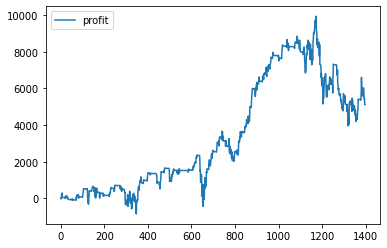

In [ ]:
# plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

### Indicator on one stock

Choose the minimum error stock, throw in a bunch of indicator and trade according to indicator

In [ ]:
# First minimum error stock
min_err_list[0][0]

'CSCO'

#### Setting up

In [ ]:
# Record for all stocks
record = {}
# Select a stock
pred_stock = min_err_list[0][0]
# Remove the stock out from concatinating
interested_stock = stk_tickers.copy()
interested_stock.remove(pred_stock)
interested_stock

# Set stock dataframe
temp = pd.DataFrame({"close": stk_data.loc[:, ('Adj Close', pred_stock)],
"open": stk_data.loc[:, ('Open', pred_stock)],
"high" : stk_data.loc[:, ('High', pred_stock)],
"low" : stk_data.loc[:, ('Low', pred_stock)],
"volume" : stk_data.loc[:, ('Volume', pred_stock)]})
pred_stockDataFrame = StockDataFrame(temp.copy())

for stock in interested_stock:
  temp[stock] = pd.DataFrame({stock: stk_data.loc[:, ('Adj Close', stock)]})
  
temp['next_close'] = temp['close'].shift(-1)
# Add a feature
temp["movement percent"] = np.where((temp["close"]-temp["open"])==0 , 0,  (temp["high"]-temp["low"])/(temp["close"]-temp["open"]))


used_data = temp.dropna().copy()

temp = pd.DataFrame({"close": used_data["close"],
"open": used_data["open"],
"high" : used_data["high"],
"low" : used_data["low"],
"volume" : used_data["volume"]})
pred_stockDataFrame = StockDataFrame(temp.copy())
pred_stockDataFrame.dropna(inplace=True)

indicatorFrame = pd.DataFrame()
# In MACD the longer it stays above 0 the better
# gt is greather than
a = pred_stockDataFrame['macd'].gt(0)
b = a.cumsum()
indicatorFrame['macd_over_0_days'] = b-b.mask(a).ffill().fillna(0).astype(int)


# RSI more than 70 is good less than 30 is bad
indicatorFrame["RSI_70"]=pred_stockDataFrame['rsi_12'].gt(70).astype(int)

indicatorFrame["RSI_30"]=pred_stockDataFrame['rsi_12'].lt(70).astype(int)

# Buy and sell signal from SMA
# Cross up is buy
indicatorFrame["SMA_cross_up"] = pred_stockDataFrame['close_50_sma_xd_close_20_sma'].astype(int)

# Crossover Sell using sma
indicatorFrame["SMA_cross_down"] = pred_stockDataFrame['close_20_sma_xd_close_50_sma'].astype(int)
# OBV open balance volume
# A rising trend should be accompanied by increasing volume
indicatorFrame["vol_delta"] = pred_stockDataFrame['volume_delta'].dropna().astype(int)
a = indicatorFrame['vol_delta'].gt(0)
b = a.cumsum()
indicatorFrame['vol_delta_sum'] = b-b.mask(a).ffill().fillna(0).astype(int)

# Bollinger band controls how high the stock should be 
indicatorFrame['bb_up'] = pred_stockDataFrame['boll_ub']>pred_stockDataFrame["high"].astype(int)

indicatorFrame['bb_down'] = pred_stockDataFrame['boll_lb']>pred_stockDataFrame["low"].astype(int)
indicatorFrame.dropna(inplace = True)

return_period = 1
Y = np.log(stk_data.loc[:, ('Adj Close', pred_stock)]).diff(return_period).\
shift(-return_period)
#If stock will go up in one day
# If difference is 0, convention is to consider it goes up
up_data = pd.DataFrame()
up_data["1_day"] =temp["close"].diff(1).shift(-1).dropna().ge(0).astype(int)
up_data["5_day"] =temp["close"].diff(5).shift(-5).dropna().ge(0).astype(int)

up_data.dropna(inplace= True)
up_data.head()

usedData = pd.concat([up_data,indicatorFrame],axis=1)
usedData.dropna(inplace=True)



#### Machine learning part

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_1_day = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(usedData[indicatorFrame.columns], usedData[up_data.columns], test_size=test_size, shuffle=False)

clf_1_day.fit(X_train, y_train["1_day"])

clf_5_day = DecisionTreeClassifier(random_state=0)

clf_5_day.fit(X_train, y_train["5_day"])

pd.DataFrame({"name":clf_1_day.feature_names_in_, " val":clf_1_day.feature_importances_})

,name,val
0,macd_over_0_days,0.218984
1,RSI_70,0.006543
2,RSI_30,0.004124
3,SMA_cross_up,0.002977
4,SMA_cross_down,0.003405
5,vol_delta,0.736263
6,vol_delta_sum,0.027177
7,bb_up,0.000527
8,bb_down,0.000000


In [ ]:
from sklearn.metrics import classification_report
# Basically using a lot of indicators mean we are correct half of the time
# From this result
# Can try with different time period
print(classification_report(clf_1_day.predict(X_test),y_test["1_day"]))
print(classification_report(clf_5_day.predict(X_test),y_test["5_day"]))


              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       709
         1.0       0.49      0.53      0.51       689

    accuracy                           0.50      1398
   macro avg       0.50      0.50      0.50      1398
weighted avg       0.50      0.50      0.50      1398

              precision    recall  f1-score   support

         0.0       0.47      0.42      0.44       659
         1.0       0.53      0.58      0.55       739

    accuracy                           0.50      1398
   macro avg       0.50      0.50      0.50      1398
weighted avg       0.50      0.50      0.50      1398



#### Performing trade

In [ ]:
# A very manual way of evaluation profit of the strategy
eval_profit = pd.concat([temp,X_test],axis=1).dropna()
# Whether we hold a stock
hold = False
#Net Profit
# Let's make it array so we can keep track of profit
money_rec_single = [0] * len(eval_profit)
pos = 0 
starting_cash = cash 
#Transaction Percent
transac_percent = transac
# num of days to hold
hold_days = hold_days
# leftover days
days = hold_days
idx = 0
for index, row in eval_profit.iterrows():
  # Obtain prediction
  day_1_up_pred = clf_1_day.predict(pd.DataFrame(row[indicatorFrame.columns]).transpose())[0]
  day_5_up_pred = clf_5_day.predict(pd.DataFrame(row[indicatorFrame.columns]).transpose())[0]
  # If both prediction says up and we are not holding
  if (day_1_up_pred>0) & (day_5_up_pred>0) & (not hold):
    hold = True
    #Let's buy when market close

    pos = (1-transac_percent)*starting_cash/row["close"]
    money_rec_single[idx] = pos*row["close"]
  # If we are holding then we countdown days to sell
  elif hold:
    days = days -1
    money_rec_single[idx] = pos*row["close"]
    #if days is 0 we sell
    if days ==0:
      #Sell stocks
      # Reset conditions
      starting_cash = pos*row["close"]
      days=hold_days
      hold = False
      pos = 0
  else:
     money_rec_single[idx] = starting_cash

  
  idx+=1

<ipython-input-334-e2cd8ecf16b7>:2: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  eval_profit = pd.concat([temp,X_test],axis=1).dropna()


#### Result

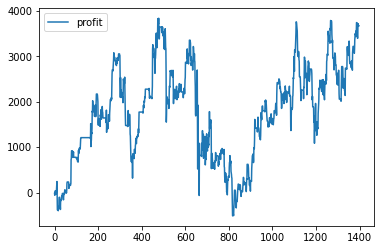

In [ ]:
#plt.plot(money_rec_single)
#plt.plot(money_rec_single, label="cash")
profit_single = (np.array(money_rec_single)-cash).tolist()
plt.plot(profit_single, label="profit")
plt.legend()

### Adding external factors

Let's go back to our equally weighted portfolio 
but add oil, gold and S&P 500 as predictor

We modify our strategy by using S&P 500 prediction as well

So now half of stocks must be predicted up, and S&P in 1 and 5 days also needs to be up.

To predict S&P, we use S&P itself, oil and gold

#### Data

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

path = "drive/MyDrive/brent-daily_csv.csv"
df_bonus = pd.read_csv(path)

#and do same thing
df_bonus.set_index(pd.to_datetime(df_bonus["Date"]),inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_bonus

,Date,Price
Date,,
1987-05-20,1987-05-20,18.63
1987-05-21,1987-05-21,18.45
1987-05-22,1987-05-22,18.55
1987-05-25,1987-05-25,18.60
1987-05-26,1987-05-26,18.63
...,...,...
2023-02-15,2023-02-15,84.11
2023-02-16,2023-02-16,83.84
2023-02-17,2023-02-17,81.97


In [ ]:
yfin.pdr_override()
# ^ GSPC is S&P 500
gold_data = pdr.get_data_yahoo(["GC=F","^GSPC"])


[*********************100%***********************]  2 of 2 completed


In [ ]:
total_data = pd.concat([gold_data["Adj Close"].dropna(),df_bonus ],axis= 1).dropna()
total_data.drop(["Date"],inplace=True,axis=1)
total_data.head()

,GC=F,^GSPC,Price
Date,,,
2000-08-30,273.899994,1502.589966,34.13
2000-08-31,278.299988,1517.680054,35.08
2000-09-01,277.000000,1520.770020,35.09
2000-09-05,275.799988,1507.079956,35.72
2000-09-06,274.200012,1492.250000,36.70


In [ ]:
from google.colab import files

total_data.to_csv("total_data.csv")
files.download("total_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
total_data.columns = ["Gold", "S&P500","Oil"]

In [ ]:
up_data_SP500 = pd.DataFrame()
up_data_SP500["1_day"] =total_data["S&P500"].diff(1).shift(-1).dropna().ge(0).astype(int)
up_data_SP500["5_day"] =total_data["S&P500"].diff(5).shift(-5).dropna().ge(0).astype(int)

up_data_SP500.dropna(inplace= True)
up_data_SP500.head()

,1_day,5_day
Date,,
2000-08-30,1,0.0
2000-08-31,1,0.0
2000-09-01,0,0.0
2000-09-05,0,0.0
2000-09-06,1,0.0


In [ ]:
# Need to truncate the date to match test set
total_data_up = pd.concat([up_data_SP500,total_data.pct_change()],axis=1)
total_data_up =total_data_up.dropna().iloc[:,: (len(up_data_SP500.columns)+len(total_data.columns))].copy()

In [ ]:
# Date of test set is
min(min_err_list[0][1]["real"].index)

Timestamp('2017-08-07 00:00:00')

In [ ]:
train_set_total = total_data_up[total_data_up.index <min(min_err_list[0][1]["real"].index) ]

In [ ]:
# Thankfully all data are from same market so their date intersection
# is just the date starting from test and ends at another one
# depending on which is lower
test_set_total= pd.concat([total_data_up,min_err_list[0][1]["real"]],axis=1)
test_set_total=test_set_total.dropna().iloc[:,: (len(up_data_SP500.columns)+len(total_data.columns))].copy()

#### Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_1_day = DecisionTreeClassifier(random_state=0)

clf_1_day.fit(train_set_total.drop(["1_day","5_day"],axis=True), train_set_total["1_day"])

clf_5_day = DecisionTreeClassifier(random_state=0)

clf_5_day.fit(train_set_total.drop(["1_day","5_day"],axis=True),train_set_total["5_day"])

pd.DataFrame({"name":clf_1_day.feature_names_in_, " val":clf_1_day.feature_importances_})

,name,val
0,Gold,0.338083
1,S&P500,0.338927
2,Oil,0.322990


#### Result

In [ ]:
n_decision = math.ceil(nstocks/2.0)
cash = 10000
stock_pos = [0]*nstocks
starting_cash = cash 
hold_days = 5
days = hold_days
#transaction cost
transac = 0.002
#Cash money
# Add min_length here because needs to account for shorter time
# Luckily we have all the matching opening date 
# So doing loop never has this date disparity
# Think about if one market opens on Sunday but another opens on Saturday
min_length = min(len(min_err_list[0][1]["real"].index),len(test_set_total))

money_record = [0]* min_length
holding = False

In [ ]:
idx = 0
for i in range(0,min_length):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  SP1days = clf_1_day.predict(pd.DataFrame(test_set_total.iloc[i,2:len(test_set_total.columns)]).transpose())
  SP5days = clf_5_day.predict(pd.DataFrame(test_set_total.iloc[i,2:len(test_set_total.columns)]).transpose())
 
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]
  # number where prediction up i
  pred_up = (sum(pred>real))
  # now account for S&P
  if (not holding) & (pred_up >=n_decision)& (SP1days[0] > 0 )& (SP5days[0] > 0 ):
    holding = True 
    # position array
    stock_pos = np.array([starting_cash*(1-transac)]*nstocks)/nstocks / real
    money_record[i] = sum(stock_pos*real)
    #print("buy")
    #print(sum(stock_pos*real))
    
  elif holding:
    # value of portfolio
    #print("hold")
    money_record[i] = sum(stock_pos*real)
    days = days-1
    # if days to hold is 0, we sell
    if days == 0 :
      #print("sell and cash")
      holding = False
      days = hold_days

      starting_cash = sum(stock_pos*real)*(1-transac)
      #print(starting_cash)
      stock_pos = [0]*nstocks
  else :
    money_record[i] = starting_cash


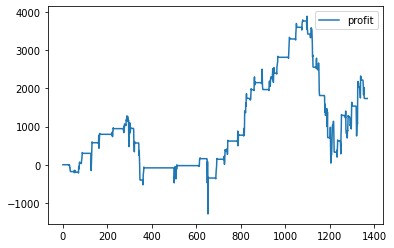

In [ ]:
#plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

### Mean Variance optimized

That kind of portfolio instead of equal weight.

No rebalance/ recalculate weight at any time.

Adapted from https://builtin.com/data-science/portfolio-optimization-python



#### Finding weight

In [ ]:
min_date = min(min_err_list[0][1]["real"].index)
min_date

Timestamp('2017-08-07 00:00:00')

In [ ]:
wholeStock = pd.DataFrame(stk_data.loc[:, ('Adj Close')])
# We only use data before test set to find weight
wholeStock = wholeStock[wholeStock.index <min_date].dropna()

In [ ]:
# This is the stocks we choose nstocks minimum error to trade
trading_stock = [i[0] for i in min_err_list]
trading_stock

['CSCO', 'AAPL', 'GOOGL', 'AMZN', 'MSFT']

In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
chosen_stock = wholeStock[trading_stock]
# Require input as price of stock dataframe
mu = mean_historical_return(chosen_stock)
S = CovarianceShrinkage(chosen_stock).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'CSCO': 0.0, 'AAPL': 0.68575, 'GOOGL': 0.20075, 'AMZN': 0.1135, 'MSFT': 0.0}


In [ ]:
# record the weight
port_weight= np.array(list(cleaned_weights.values()) )


#### Result

In [ ]:
n_decision = math.ceil(nstocks/2.0)
cash = 10000
stock_pos = [0]*nstocks
starting_cash = cash 
hold_days = 5
days = hold_days
#transaction cost
transac = 0.002
#Cash money
money_record = [0]* len(min_err_list[0][1]["real"].index)
holding = False

In [ ]:
idx = 0
for i in range(0,len(min_err_list[0][1]["real"].index)):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]
  # number where prediction up i
  pred_up = (sum(pred>real))
  if (not holding) & (pred_up >=n_decision):
    holding = True 
    # position array
    stock_pos = (starting_cash*(1-transac))*port_weight / real
    money_record[i] = sum(stock_pos*real)
    #print("buy")
    #print(sum(stock_pos*real))
    
  elif holding:
    # value of portfolio
    #print("hold")
    money_record[i] = sum(stock_pos*real)
    days = days-1
    # if days to hold is 0, we sell
    if days == 0 :
      #print("sell and cash")
      holding = False
      days = hold_days

      starting_cash = sum(stock_pos*real)*(1-transac)
      #print(starting_cash)
      stock_pos = [0]*nstocks
  else :
    money_record[i] = starting_cash


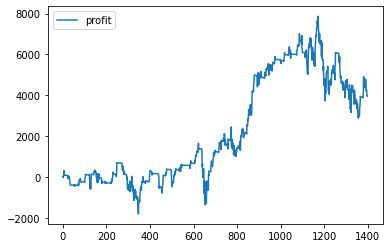

In [ ]:
#plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

### Mean Variance optimized Calibrate

Calibrate the weight every time we buy

In [ ]:
n_decision = math.ceil(nstocks/2.0)
cash = 10000
stock_pos = [0]*nstocks
starting_cash = cash 
hold_days = 5
days = hold_days
#transaction cost
transac = 0.002
#Cash money
money_record = [0]* len(min_err_list[0][1]["real"].index)
holding = False

In [ ]:
idx = 0
for i in range(0,len(min_err_list[0][1]["real"].index)):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  minDate = min_err_list[0][1]["real"].index[i]
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]
  # number where prediction up i
  pred_up = (sum(pred>real))
  if (not holding) & (pred_up >=n_decision):
    holding = True 
    # Finding weight
    wholeStock = pd.DataFrame(stk_data.loc[:, ('Adj Close')])
    # We only use data before test set to find weight
    wholeStock = wholeStock[wholeStock.index <minDate].dropna()
    # This is the stocks we choose nstocks minimum error to trade
    trading_stock = [i[0] for i in min_err_list]
    trading_stock
    chosen_stock = wholeStock[trading_stock]
    # Require input as price of stock dataframe
    mu = mean_historical_return(chosen_stock)
    S = CovarianceShrinkage(chosen_stock).ledoit_wolf()
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()

    cleaned_weights = ef.clean_weights()
    port_weight= np.array(list(cleaned_weights.values()) )
    #print(port_weight)
    # End of finding weight
    # position array
    stock_pos = (starting_cash*(1-transac))*port_weight / real
    money_record[i] = sum(stock_pos*real)
    #print("buy")
    #print(sum(stock_pos*real))
    
  elif holding:
    # value of portfolio
    #print("hold")
    money_record[i] = sum(stock_pos*real)
    days = days-1
    # if days to hold is 0, we sell
    if days == 0 :
      #print("sell and cash")
      holding = False
      days = hold_days

      starting_cash = sum(stock_pos*real)*(1-transac)
      #print(starting_cash)
      stock_pos = [0]*nstocks
  else :
    money_record[i] = starting_cash


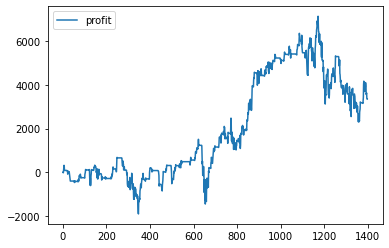

In [ ]:
#plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

### Rebalancing/ Benchmark portfolio

A portfolio where buy at start (with no prediction) and rebalances it self to maintain a certain weight after period of time (rebalance)

#### Equally weighted, Monthly rebalanceed

In [ ]:
n_decision = math.ceil(nstocks/2.0)

stock_pos = [0]*nstocks
starting_cash = cash 

days = hold_days

#Cash money
money_record = [0]* len(min_err_list[0][1]["real"].index)
holding = False


days_to_rebal = rebal_days

In [ ]:
idx = 0
for i in range(0,len(min_err_list[0][1]["real"].index)):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]

  # buy everything equally on first day
  if i == 0:
      stock_pos = np.array([starting_cash*(1-transac)]*nstocks)/nstocks / real

  days_to_rebal = days_to_rebal -1

  # rebalanced day sell everything and distribute equal weight
  if days_to_rebal == 0:
      starting_cash = sum(stock_pos*real)*(1-transac)

      stock_pos = np.array([starting_cash*(1-transac)]*nstocks)/nstocks / real
      days_to_rebal = rebal_days
  money_record[i] = sum(stock_pos*real)
    
  

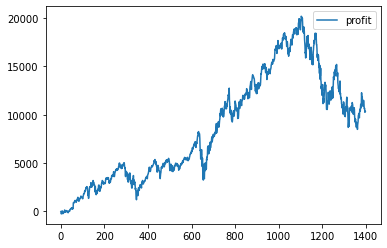

In [ ]:
#plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

#### Mean Variance Optimized, Monthly rebalanceed

In [ ]:
n_decision = math.ceil(nstocks/2.0)

stock_pos = [0]*nstocks
starting_cash = cash 

days = hold_days

#Cash money
money_record = [0]* len(min_err_list[0][1]["real"].index)
holding = False


days_to_rebal = rebal_days

In [ ]:
idx = 0
for i in range(0,len(min_err_list[0][1]["real"].index)):
  pred = np.array([0.0]*nstocks)
  real = np.array([0.0]*nstocks)
  for j in range(0,len(min_err_list)):
    stockInfo = min_err_list[j][1]
    pred[j] = stockInfo["pred"].iloc[i,0]

    real[j] = stockInfo["real"][i]

  # buy everything according to weight on first day
  if i == 0:
      # Finding weight
      wholeStock = pd.DataFrame(stk_data.loc[:, ('Adj Close')])
      # We only use data before test set to find weight
      wholeStock = wholeStock[wholeStock.index <minDate].dropna()
      # This is the stocks we choose nstocks minimum error to trade
      trading_stock = [i[0] for i in min_err_list]
      trading_stock
      chosen_stock = wholeStock[trading_stock]
      # Require input as price of stock dataframe
      mu = mean_historical_return(chosen_stock)
      S = CovarianceShrinkage(chosen_stock).ledoit_wolf()
      ef = EfficientFrontier(mu, S)
      weights = ef.max_sharpe()

      cleaned_weights = ef.clean_weights()
      port_weight= np.array(list(cleaned_weights.values()) )
      #print(port_weight)
      # End of finding weight

      # position array
      stock_pos = (starting_cash*(1-transac))*port_weight / real
  
  days_to_rebal = days_to_rebal -1

  # rebalanced day sell everything and distribute equal weight
  if days_to_rebal == 0:
      starting_cash = sum(stock_pos*real)*(1-transac)

      # Finding weight
      wholeStock = pd.DataFrame(stk_data.loc[:, ('Adj Close')])
      # We only use data before test set to find weight
      wholeStock = wholeStock[wholeStock.index <minDate].dropna()
      # This is the stocks we choose nstocks minimum error to trade
      trading_stock = [i[0] for i in min_err_list]
      trading_stock
      chosen_stock = wholeStock[trading_stock]
      # Require input as price of stock dataframe
      mu = mean_historical_return(chosen_stock)
      S = CovarianceShrinkage(chosen_stock).ledoit_wolf()
      ef = EfficientFrontier(mu, S)
      weights = ef.max_sharpe()

      cleaned_weights = ef.clean_weights()
      port_weight= np.array(list(cleaned_weights.values()) )
      #print(port_weight)
      # End of finding weight

      # position array
      stock_pos = (starting_cash*(1-transac))*port_weight / real
      days_to_rebal = rebal_days
  money_record[i] = sum(stock_pos*real)
    
  

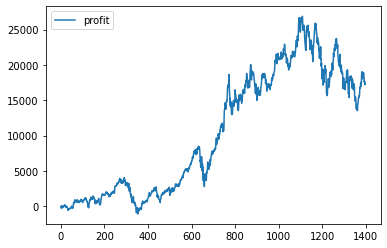

In [ ]:
#plt.plot(money_record, label="cash")
profit = (np.array(money_record)-cash).tolist()
plt.plot(profit, label="profit")
plt.legend()

References:

Tatsat, H., Puri, S. & Lookabaugh, B. (2021) Machine learning and data science blueprints for finance : from building trading strategies to robo-advisors using Python. 1st edition. Sebastopol, California, O’Reilly.